# Melanoma Detection Assignment

### <span style="color:salmon">Problem Statement:</span>

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### <span style="color:salmon">Business Objective:</span>

The business objective is to develop a custom convolutional neural network (CNN) model for accurate melanoma detection, aimed at enhancing the efficiency, accuracy, and accessibility of skin cancer diagnosis. By automating image analysis, the model streamlines the diagnostic process, allowing dermatologists to focus on critical cases, thus accelerating treatment decisions. This initiative aims to improve patient outcomes by facilitating early detection of melanoma, reducing the risk of misdiagnosis, and ensuring timely interventions. Moreover, the scalable nature of the CNN model enables widespread adoption across healthcare facilities, addressing geographic disparities in access to specialized dermatological services. Ultimately, the objective is to leverage technology to mitigate the human error associated with manual diagnosis, providing consistent and objective evaluations of skin lesions to improve diagnostic accuracy and positively impact patient care.



### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D

In [8]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'termios'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
#Setting up root path
root_path = 'gdrive/My Drive/CNN_Assignment_Upgrad/'

In [6]:
# Defining the path for train and test images
data_dir = pathlib.Path(os.path.join(root_path,"Skin_cancer_ISIC"))
data_dir_train = pathlib.Path(os.path.join(root_path,"Skin_cancer_ISIC","Train"))
data_dir_test = pathlib.Path(root_path,"Skin_cancer_ISIC","Test")

In [7]:
#Count number of images in Train and test directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

0
0


In [307]:
#Function for counting files under each category
def count_files(data):
  N = 0  # total files
  count_dict={}
  for dirpath, dirnames, filenames in os.walk(data):
      N_c = len(filenames)
      N += N_c
      #print(f"{dirpath.split('/')[-1]} {N_c}")
      if N_c != 0:
        count_dict[dirpath.split('/')[-1]] = N_c

  #print("************")
  #print(f"Total Files {N}")
  return count_dict


In [308]:
D = count_files(data_dir_train)
D

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [309]:
#Counting each class in test dir
V = count_files(data_dir_test)
V

{'actinic keratosis': 16,
 'basal cell carcinoma': 16,
 'dermatofibroma': 16,
 'melanoma': 16,
 'nevus': 16,
 'pigmented benign keratosis': 16,
 'seborrheic keratosis': 3,
 'squamous cell carcinoma': 16,
 'vascular lesion': 3}

In [310]:
# # plt.bar(range(len(D)), D.values(), align='center')
# # plt.xticks(range(len(D)), list(D.keys()))

# # plt.show()
# pd.DataFrame(D, index=['quantity']).plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


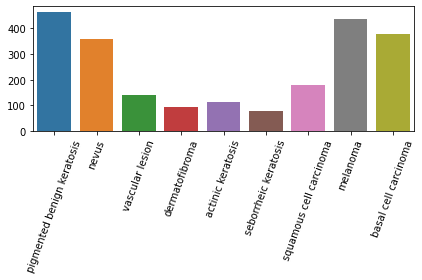

In [311]:
#Visualising class distribution of train
import seaborn as sns
D = count_files(data_dir_train)
sns.barplot(list(D.keys()), list(D.values()))
plt.xticks(rotation=70)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


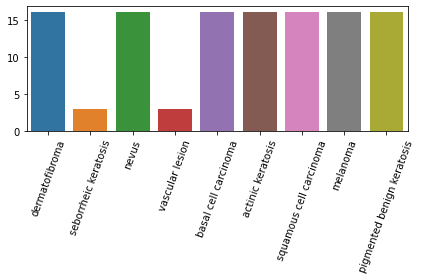

In [312]:
#Visualising class distribution of test


sns.barplot(list(V.keys()), list(V.values()))
plt.xticks(rotation=70)
plt.tight_layout()

In [313]:
#Number of classes
CLASS_NAMES = np.array([item.name for item in data_dir_train.glob('*')])
CLASS_NAMES

array(['pigmented benign keratosis', 'nevus', 'vascular lesion',
       'dermatofibroma', 'actinic keratosis', 'seborrheic keratosis',
       'squamous cell carcinoma', 'melanoma', 'basal cell carcinoma'],
      dtype='<U26')

So there are 9 types of classes of skin pattern as per the training data. Lets check for test classes

In [314]:
CLASS_NAMES_TEST = np.array([item.name for item in data_dir_test.glob('*')])
CLASS_NAMES_TEST

array(['dermatofibroma', 'seborrheic keratosis', 'nevus',
       'vascular lesion', 'basal cell carcinoma', 'actinic keratosis',
       'squamous cell carcinoma', 'melanoma',
       'pigmented benign keratosis'], dtype='<U26')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [315]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [316]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  #validation_split = 0.2,
  #subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.


In [317]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #shuffle=True,
  #validation_split = 0.2,
  #subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [318]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [319]:
#Number of output classes
NUM_CLASSES = len(class_names)
NUM_CLASSES

9

In [320]:
# Create a dictionary for each type of label 
labels = {0 : 'actinic keratosis', 1: 'basal cell carcinoma', 2: 'dermatofibroma', 3: 'melanoma', 4: 'nevus',
          5: 'pigmented benign keratosis', 6: 'seborrheic keratosis', 7: 'squamous cell carcinoma', 8: 'vascular lesion'}



In [321]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

In [322]:
# We need a bigger batch size for getting all 9 classes in one batch
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 100
# For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
IMG_HEIGHT = img_height #600  This should map with the height and width of the pretrained model
IMG_WIDTH = img_width #450 This should map with the height and width of the pretrained model
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

train_data_gen2 = image_generator.flow_from_directory(directory=str(list(data_dir.glob('Train'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 2239 images belonging to 9 classes.


In [323]:
# Show one image from each class
def show_batch_unique_class(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    img_list = {}
    for n in range(100):
        
        # plt.imshow(cv2.cvtColor(image_batch[n], cv2.COLOR_BGR2RGB))
        if CLASS_NAMES[label_batch[n]==1][0] not in img_list:
          img_list[CLASS_NAMES[label_batch[n]==1][0]] = n
    for i, (k, v) in enumerate(img_list.items()):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[v])
        #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.title(k)
        plt.axis('off')
    print(len(img_list))

In [324]:
#Get a batch from train gen
image_batch2, label_batch2 = next(train_data_gen2)

9


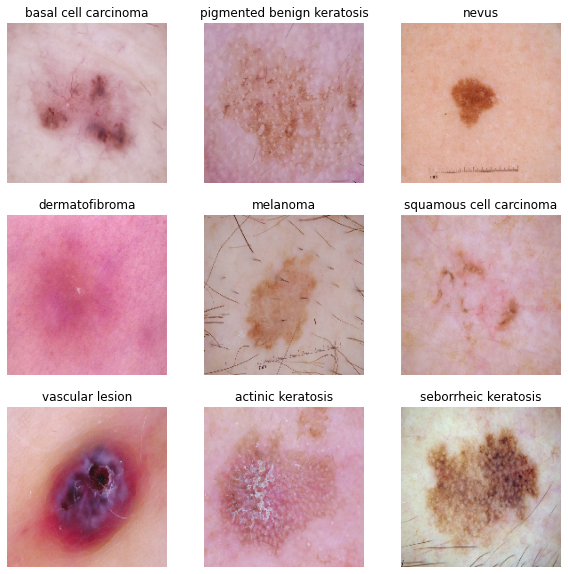

In [325]:
#Show all 9 Unique classes with one image each
show_batch_unique_class(image_batch2, label_batch2)

**Visualising a full batch of random images with 32 batch Size**

In [326]:
# Keras.preprocessing
# The 1./255 is to convert from uint8 to float32 in range [0,1].
train_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # for train data
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Generator for our validation data

BATCH_SIZE = 32
# For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
IMG_HEIGHT = img_height #600  This should map with the height and width of the pretrained model
IMG_WIDTH = img_width #450 This should map with the height and width of the pretrained model
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

train_data_gen = train_image_generator.flow_from_directory(directory=str(list(data_dir.glob('Train'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 2239 images belonging to 9 classes.


In [327]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=str(list(data_dir.glob('Test'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 118 images belonging to 9 classes.


In [328]:
# We can inspect how a full batch is created
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(32):
        ax = plt.subplot(8,4,n+1)
        # plt.imshow(cv2.cvtColor(image_batch[n], cv2.COLOR_BGR2RGB))
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

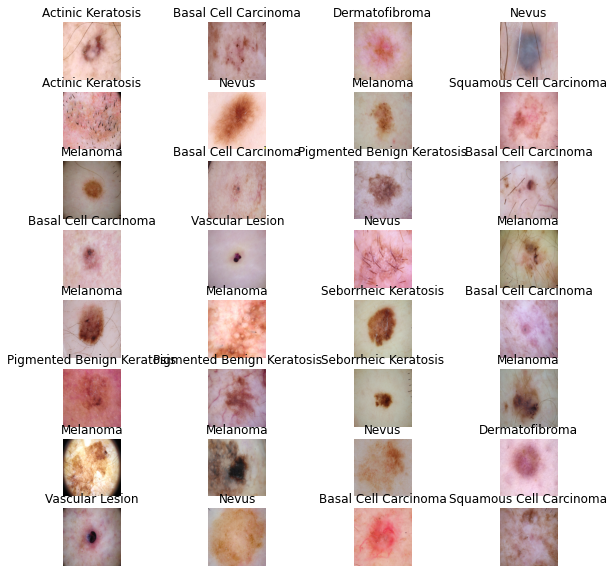

In [329]:
#Show a full batch of images
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [330]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [331]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [332]:
#Keep input shape for reuse
INPUT_SHAPE = (img_height,img_width,3)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [333]:
# ### Building a basic Sequential model
# # Model
# #model = Sequential()
# #input
# keras.backend.clear_session()
# inputs = keras.Input(shape=INPUT_SHAPE)
# #Preprocessing
# x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)

# # Add convolution 2D
# x = layers.Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',)(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(64, (3, 3), activation='relu')(x)
# #x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)  # OUTPUT LAYER

# model = keras.Model(inputs=inputs, outputs=outputs)

In [334]:
### Building a basic Sequential model
# Model alternate way
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=INPUT_SHAPE),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [335]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [336]:
# View the summary of all layers
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 22, 22, 64)      

### Train the model

In [337]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 28s 80ms/step - loss: 2.2096 - accuracy: 0.2210 - val_loss: 2.2512 - val_accuracy: 0.2373
Epoch 2/20
70/70 [==============================] - 1s 13ms/step - loss: 1.7490 - accuracy: 0.3647 - val_loss: 2.0868 - val_accuracy: 0.2627
Epoch 3/20
70/70 [==============================] - 1s 13ms/step - loss: 1.5480 - accuracy: 0.4610 - val_loss: 2.1334 - val_accuracy: 0.3390
Epoch 4/20
70/70 [==============================] - 1s 13ms/step - loss: 1.4116 - accuracy: 0.5070 - val_loss: 1.9252 - val_accuracy: 0.3051
Epoch 5/20
70/70 [==============================] - 1s 13ms/step - loss: 1.3131 - accuracy: 0.5429 - val_loss: 2.3085 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 1s 14ms/step - loss: 1.2809 - accuracy: 0.5394 - val_loss: 2.3428 - val_accuracy: 0.3983
Epoch 7/20
70/70 [==============================] - 1s 13ms/step - loss: 1.1889 - accuracy: 0.5999 - val_loss: 2.5365 - val_accuracy: 0.3220
Epoch 8/20
7

In [338]:
#Save the model history
model_file_1st = os.path.join(root_path, "CNN_1st.npy")
np.save(model_file_1st,history.history)
model.save(os.path.join(root_path,"CNN_1st"))



INFO:tensorflow:Assets written to: gdrive/My Drive/CNN_Assignment_Upgrad/CNN_1st/assets


In [339]:
#To load back history
#history_load=np.load(model_file_1st,allow_pickle='TRUE').item()

In [340]:
# #Saving the model for reuse and save time upon rerun
# # serialize to JSON
# json_file_1st = model.to_json()
# model_file_1st = os.path.join(root_dir, "model_json_1.json")
# h5_file_1st = os.path.join(root_dir, "h5_file_1st")
# with open(, "w") as file:
#    file.write(json_file_1st)
# # serialize weights to HDF5
# model.save_weights(h5_file_1st)

In [341]:
# from keras.models import model_from_json
# # load json and create model
# file = open(json_file, 'r')
# model_json = file.read()
# file.close()
# loaded_model = model_from_json(model_json)
# # load weights
# loaded_model.load_weights(h5_file)

### Visualizing training results

In [342]:
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

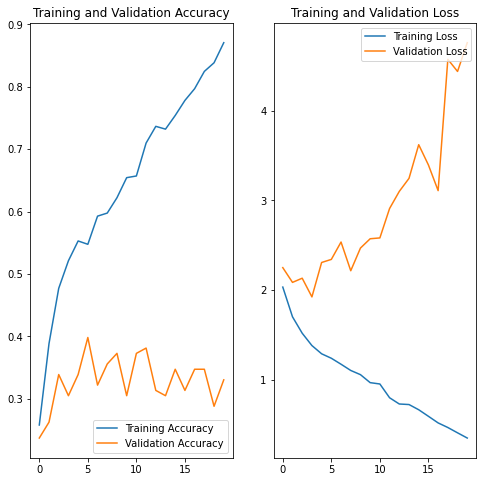

In [343]:
#Plot the history
plot_history(history)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here



### Its a clear case of Overfitting as training accuracy is way above than validation accuracy.

In [344]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

## Model Version 2 : With dropouts only
### Create the model, compile and train the model


In [345]:
# ## We can use Dropout layers to tackle the overfitting
# keras.backend.clear_session()
# #input
# inputs = keras.Input(shape=INPUT_SHAPE)
# #Preprocessing
# x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)

# # Add convolution 2D
# x = layers.Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',)(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Dropout(0.10)(x)

# x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Dropout(0.20)(x)

# x = layers.Conv2D(128, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(128, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Dropout(0.20)(x)

# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dropout(0.20)(x)
# outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)  # OUTPUT LAYER

# model2 = keras.Model(inputs=inputs, outputs=outputs)



In [346]:
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=INPUT_SHAPE),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

### Compiling the model

In [347]:
## Your code goes here
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

#Model Summary
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 45, 45, 32)      

### Training the model

In [348]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 2s 18ms/step - loss: 1.9761 - accuracy: 0.2391 - val_loss: 2.0099 - val_accuracy: 0.2881
Epoch 2/20
70/70 [==============================] - 1s 15ms/step - loss: 1.6506 - accuracy: 0.4245 - val_loss: 1.9852 - val_accuracy: 0.3051
Epoch 3/20
70/70 [==============================] - 1s 15ms/step - loss: 1.4861 - accuracy: 0.4547 - val_loss: 2.1895 - val_accuracy: 0.2881
Epoch 4/20
70/70 [==============================] - 1s 15ms/step - loss: 1.3805 - accuracy: 0.5201 - val_loss: 1.8723 - val_accuracy: 0.3136
Epoch 5/20
70/70 [==============================] - 1s 15ms/step - loss: 1.3259 - accuracy: 0.5282 - val_loss: 2.0226 - val_accuracy: 0.2966
Epoch 6/20
70/70 [==============================] - 1s 15ms/step - loss: 1.2633 - accuracy: 0.5590 - val_loss: 2.1451 - val_accuracy: 0.3729
Epoch 7/20
70/70 [==============================] - 1s 15ms/step - loss: 1.1888 - accuracy: 0.5778 - val_loss: 2.1219 - val_accuracy: 0.2881
Epoch 8/20
70

In [349]:
#Save the model history
model_file_2nd = os.path.join(root_path, "CNN_2nd.npy")
np.save(model_file_2nd,history2.history)
model2.save(os.path.join(root_path,"CNN_2nd"))

INFO:tensorflow:Assets written to: gdrive/My Drive/CNN_Assignment_Upgrad/CNN_2nd/assets


In [350]:
#Load the model when required
#history2_load=np.load(model_file_2nd,allow_pickle='TRUE').item()

In [351]:
history2_load

{'accuracy': [0.18535059690475464,
  0.20098258554935455,
  0.32157212495803833,
  0.35551586747169495,
  0.4041982889175415,
  0.4184904098510742,
  0.43322911858558655,
  0.4452880620956421,
  0.48771771788597107,
  0.5185350775718689,
  0.5185350775718689,
  0.5457793474197388,
  0.5868691205978394,
  0.6208128333091736,
  0.6431442499160767,
  0.6614559888839722,
  0.6962929964065552,
  0.7288968563079834,
  0.7266637086868286,
  0.7668601870536804],
 'loss': [2.1035187244415283,
  2.034069061279297,
  1.8371986150741577,
  1.716180443763733,
  1.6538116931915283,
  1.5860464572906494,
  1.5616185665130615,
  1.5490357875823975,
  1.4418141841888428,
  1.3616005182266235,
  1.3538168668746948,
  1.243564486503601,
  1.1848623752593994,
  1.1013439893722534,
  1.029380202293396,
  0.9603478908538818,
  0.8235893845558167,
  0.7434542775154114,
  0.7786514759063721,
  0.6185570359230042],
 'val_accuracy': [0.1355932205915451,
  0.1355932205915451,
  0.20338982343673706,
  0.245762705

### Visualizing the results

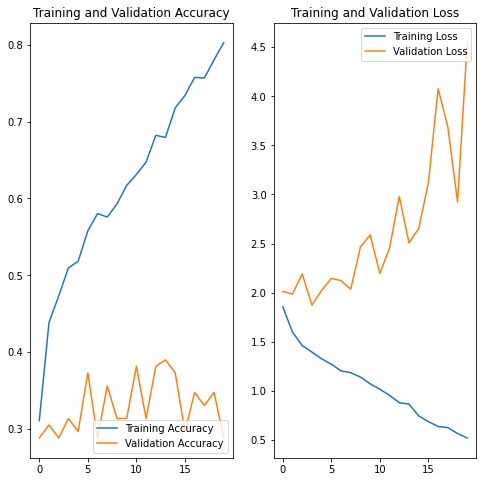

In [352]:
plot_history(history=history2)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding : Model has performed poor even though it was able to generalise better than model version 1.**

## Model 3 : With Augmentation and Drop Outs

In [353]:
#Lets apply some augmenttaion to our image
data_augmentation = keras.Sequential(
  [ 
    #layers.experimental.preprocessing.RandomFlip("horizontal", 
    #                                             input_shape=INPUT_SHAPE),
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=INPUT_SHAPE),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.3)
  ]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


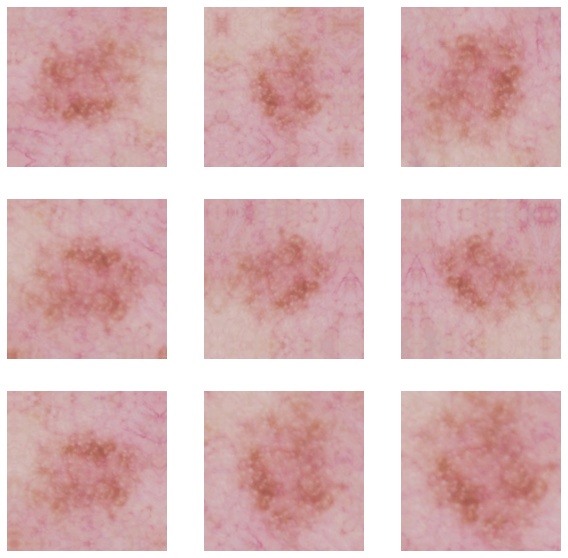

In [354]:
#Visualise few samples after resize
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [355]:
#With Augmentation

# ## We can use Dropout layers to tackle the overfitting
# keras.backend.clear_session()
# #input
# inputs = keras.Input(shape=INPUT_SHAPE)
# kernel_initializer = 'glorot_uniform'
# #Preprocessing and Augmentation
# x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
# x = layers.experimental.preprocessing.RandomFlip("horizontal")(x)
# x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
# x = layers.experimental.preprocessing.RandomZoom(0.1)(x)
# # Add convolution 2D
# x = layers.Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Dropout(0.10)(x)

# x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Dropout(0.20)(x)

# x = layers.Conv2D(128, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Dropout(0.10)(x)

# x = layers.Conv2D(256, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# x = layers.Dropout(0.10)(x)

# x = layers.Conv2D(128, (3, 3), activation='relu',padding = 'Same')(x)
# #x = layers.Conv2D(128, (3, 3), activation='relu',padding = 'Same')(x)
# x = layers.MaxPool2D(pool_size = (2, 2))(x)
# #x = layers.Dropout(0.20)(x)

# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu', kernel_initializer='normal')(x)
# #x = layers.Dropout(0.20)(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)  # OUTPUT LAYER

# model3 = keras.Model(inputs=inputs, outputs=outputs)

In [356]:
model3 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.15),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [357]:
## Compile model 3
from keras.optimizers import Adam
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

#Model Summary
model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 45, 45, 64)      

In [358]:
#Run Model 3
epochs = 20
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 2s 19ms/step - loss: 2.0889 - accuracy: 0.1864 - val_loss: 2.4463 - val_accuracy: 0.2034
Epoch 2/20
70/70 [==============================] - 1s 17ms/step - loss: 1.8845 - accuracy: 0.2908 - val_loss: 2.0752 - val_accuracy: 0.3220
Epoch 3/20
70/70 [==============================] - 1s 17ms/step - loss: 1.6583 - accuracy: 0.4102 - val_loss: 2.5368 - val_accuracy: 0.3051
Epoch 4/20
70/70 [==============================] - 1s 17ms/step - loss: 1.5903 - accuracy: 0.4106 - val_loss: 2.6818 - val_accuracy: 0.3559
Epoch 5/20
70/70 [==============================] - 1s 18ms/step - loss: 1.4694 - accuracy: 0.4956 - val_loss: 2.1375 - val_accuracy: 0.3475
Epoch 6/20
70/70 [==============================] - 1s 17ms/step - loss: 1.4099 - accuracy: 0.4962 - val_loss: 2.0216 - val_accuracy: 0.3475
Epoch 7/20
70/70 [==============================] - 1s 17ms/step - loss: 1.3938 - accuracy: 0.4964 - val_loss: 2.1324 - val_accuracy: 0.3644
Epoch 8/20
70

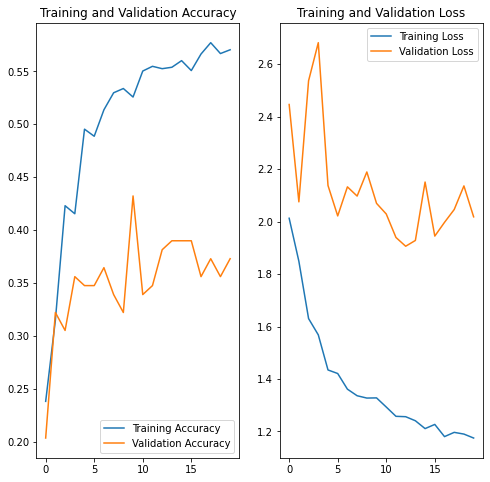

In [359]:
plot_history(history=history3)

The accuracy is  not promising at all even though its generailising better with Drop outs and image augmentations !!!

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{'pigmented benign keratosis': 462, 'nevus': 357, 'vascular lesion': 139, 'dermatofibroma': 95, 'actinic keratosis': 114, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'melanoma': 438, 'basal cell carcinoma': 376}


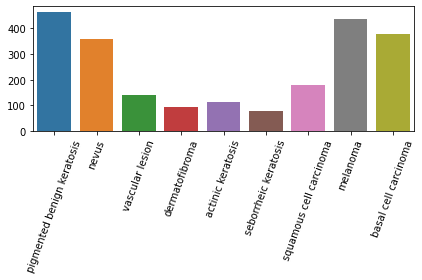

In [360]:
## Your code goes here.
#Visualising class distribution of train
import seaborn as sns
D = count_files(data_dir_train)
sns.barplot(list(D.keys()), list(D.values()))
plt.xticks(rotation=70)
plt.tight_layout()
print(D)

In [379]:
#Alternate way :

import glob
path_list_org = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_org[0]

'gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/pigmented benign keratosis/ISIC_0024770.jpg'

In [381]:
lesion_list_org = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list_org[0]

'pigmented benign keratosis'

In [382]:
dataframe_dict_org = dict(zip(path_list_org, lesion_list_org))
original_df = pd.DataFrame(list(dataframe_dict_org.items()),columns = ['Path','Label'])

In [385]:
#Get the value counts
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


 ### Finding :
 
 #### seborrheic keratosis class has least number of samples i.e 77
 pigmented benign keratosis has highest samples i.e 462


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [361]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [362]:
data_dir_train

PosixPath('gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train')

In [363]:
#path_to_training_dataset=data_dir_train
DO_NOT_RUN_AGAIN = True
import Augmentor
if not DO_NOT_RUN_AGAIN: 
  for i in CLASS_NAMES:
      p = Augmentor.Pipeline(os.path.join(data_dir_train,i))
      p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
      p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
      p.skew(probability=0.2)
      p.shear(probability=0.2, max_shear_left=2, max_shear_right=2)
      p.flip_random(probability=0.2)
      p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F97CA0991D0>: 100%|██████████| 500/500 [00:29<00:00, 17.03 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F983B414DD0>: 100%|██████████| 500/500 [02:24<00:00,  3.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F98ECD27650>: 100%|██████████| 500/500 [00:29<00:00, 16.93 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96D5630190>: 100%|██████████| 500/500 [00:30<00:00, 16.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F98A0A0CCD0>: 100%|██████████| 500/500 [00:30<00:00, 16.55 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F98ED39AE50>: 100%|██████████| 500/500 [01:11<00:00,  6.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96D8799450>: 100%|██████████| 500/500 [00:29<00:00, 16.90 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7F983B10CBD0>: 100%|██████████| 500/500 [02:23<00:00,  3.49 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F983B73A5D0>: 100%|██████████| 500/500 [00:28<00:00, 17.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [364]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [375]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'gdrive/My Drive/CNN_Assignment_Upgrad/Skin_cancer_ISIC/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024825.jpg_c1d82cea-a620-43c3-8569-dc01434f0d4f.jpg'

In [376]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0]

'pigmented benign keratosis'

In [377]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [383]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [384]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [371]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [389]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  #validation_split = 0.2,
  #subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.


#### **Todo:** Create a validation dataset

In [391]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #validation_split = 0.2,
  #subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [392]:
## your code goes here
model4 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.15),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [393]:
## your code goes here
## Compile model 4
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

#Model Summary
model4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 45, 45, 32)      

#### **Todo:**  Train your model

In [394]:
epochs = 30
#Run Model 3
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
211/211 [==============================] - 54s 245ms/step - loss: 2.1050 - accuracy: 0.1872 - val_loss: 2.0929 - val_accuracy: 0.2542
Epoch 2/30
211/211 [==============================] - 52s 241ms/step - loss: 1.6233 - accuracy: 0.3837 - val_loss: 1.9668 - val_accuracy: 0.3814
Epoch 3/30
211/211 [==============================] - 52s 239ms/step - loss: 1.5018 - accuracy: 0.4188 - val_loss: 1.8542 - val_accuracy: 0.2966
Epoch 4/30
211/211 [==============================] - 52s 239ms/step - loss: 1.4336 - accuracy: 0.4397 - val_loss: 2.1395 - val_accuracy: 0.3644
Epoch 5/30
211/211 [==============================] - 52s 239ms/step - loss: 1.3758 - accuracy: 0.4746 - val_loss: 1.9265 - val_accuracy: 0.3729
Epoch 6/30
211/211 [==============================] - 51s 237ms/step - loss: 1.3628 - accuracy: 0.4644 - val_loss: 1.9852 - val_accuracy: 0.3814
Epoch 7/30
211/211 [==============================] - 51s 234ms/step - loss: 1.3000 - accuracy: 0.4937 - val_loss: 2.0297 - val_ac

#### **Todo:**  Visualize the model results

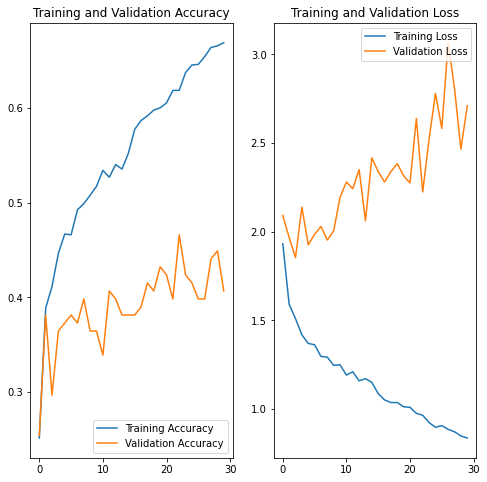

In [395]:
plot_history(history=history4)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Finding :
Even with the class rebalance and with multiple convolution layer , the accuracy is not improved much. There needs to be more trials and cross-validation technique along with few hyperparam tuning . 

## Model 5 with a different layering and adding batch normalization


In [400]:
## your code goes here
model5 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.15),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(NUM_CLASSES, activation='softmax')
])

In [401]:
## Compile model 5
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model5.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

#Model Summary
model5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_14 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 45, 45, 64)      

In [402]:
epochs = 20
#Run Model 5
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 56s 251ms/step - loss: 1.9213 - accuracy: 0.3170 - val_loss: 2.0518 - val_accuracy: 0.1949
Epoch 2/20
211/211 [==============================] - 52s 242ms/step - loss: 1.5034 - accuracy: 0.4389 - val_loss: 2.0313 - val_accuracy: 0.2881
Epoch 3/20
211/211 [==============================] - 52s 238ms/step - loss: 1.4441 - accuracy: 0.4492 - val_loss: 4.9431 - val_accuracy: 0.1017
Epoch 4/20
211/211 [==============================] - 51s 235ms/step - loss: 1.4142 - accuracy: 0.4659 - val_loss: 2.2232 - val_accuracy: 0.3729
Epoch 5/20
211/211 [==============================] - 51s 237ms/step - loss: 1.3880 - accuracy: 0.4769 - val_loss: 2.6111 - val_accuracy: 0.3644
Epoch 6/20
211/211 [==============================] - 52s 238ms/step - loss: 1.3457 - accuracy: 0.4893 - val_loss: 1.9602 - val_accuracy: 0.4322
Epoch 7/20
211/211 [==============================] - 53s 244ms/step - loss: 1.3081 - accuracy: 0.5016 - val_loss: 3.3935 - val_ac

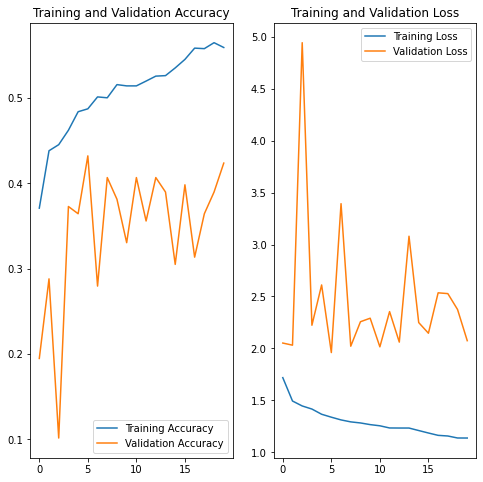

In [403]:
plot_history(history5)

#### **Conclusion:** Despite a slight improvement in validation accuracy, the model's overall accuracy remains unsatisfactory. Further experimentation and potentially an increase in training data are necessary to achieve a high-performing model.